## Data: http://bit.ly/tallerFAU2018

In [1]:
import os
import sys
from pathlib import Path
import json
import pandas as pd
import numpy as np
import shapely.geometry as sg
import matplotlib

DIR = Path('')
sys.path.append(str(DIR))

import gtfstk as gt

DATA_DIR = DIR/'data/'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# List feed
path = DATA_DIR/'ny.zip'
gt.list_gtfs(path)

,file_name,file_size
0,agency.txt,163
1,calendar.txt,549
2,calendar_dates.txt,782
3,routes.txt,11505
4,shapes.txt,4265767
5,stops.txt,72247
6,stop_times.txt,33712295
7,trips.txt,1474430
8,transfers.txt,9175


In [4]:
# Read and print feed
feed = gt.read_gtfs(path, dist_units='km')
feed.describe()

,indicator,value
0,agencies,[MTA New York City Transit]
1,timezone,America/New_York
2,start_date,20171105
3,end_date,20181231
4,num_routes,29
5,num_trips,20626
6,num_stops,1503
7,num_shapes,222
8,sample_date,20171109
9,num_routes_active_on_sample_date,28


In [5]:
# Validate
feed.validate()

,type,message,table,rows
0,error,Invalid agency_url; maybe has extra space char...,agency,[0]
1,error,Invalid route_text_color; maybe has extra spac...,routes,[1]
2,warning,Route has no trips,routes,[5]
3,warning,Stop has no stop times,stops,"[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 3..."


In [6]:
# Compute trip stats
trip_stats = feed.compute_trip_stats()
trip_stats.head()

,trip_id,route_id,route_short_name,route_type,direction_id,shape_id,num_stops,start_time,end_time,start_stop_id,end_stop_id,is_loop,duration,distance,speed
31,A20171105SAT_007200_1..N03R,1,1,1,0,1..N03R,38,01:12:00,02:10:30,142N,101N,0,0.975000,23.497986,24.100499
2437,A20171105SUN_007200_1..N03R,1,1,1,0,1..N03R,38,01:12:00,02:10:30,142N,101N,0,0.975000,23.497986,24.100499
4546,A20171105WKD_007450_1..N03R,1,1,1,0,1..N03R,38,01:14:30,02:13:30,142N,101N,0,0.983333,23.497986,23.896257
43,A20171105SAT_009200_1..N03R,1,1,1,0,1..N03R,38,01:32:00,02:30:30,142N,101N,0,0.975000,23.497986,24.100499
2449,A20171105SUN_009200_1..N03R,1,1,1,0,1..N03R,38,01:32:00,02:30:30,142N,101N,0,0.975000,23.497986,24.100499


In [7]:
# Add shape_dist_traveled column to stop times
feed = feed.append_dist_to_stop_times(trip_stats)
feed.stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
60372,A20171105SAT_000050_2..S12R,00:00:30,00:00:30,201S,1,NaN,0,0,NaN
60373,A20171105SAT_000050_2..S12R,00:02:00,00:02:00,204S,2,NaN,0,0,NaN
60374,A20171105SAT_000050_2..S12R,00:03:30,00:03:30,205S,3,NaN,0,0,NaN
60375,A20171105SAT_000050_2..S12R,00:04:30,00:04:30,206S,4,NaN,0,0,NaN
60376,A20171105SAT_000050_2..S12R,00:05:30,00:05:30,207S,5,NaN,0,0,NaN
60377,A20171105SAT_000050_2..S12R,00:07:00,00:07:00,208S,6,NaN,0,0,NaN
60378,A20171105SAT_000050_2..S12R,00:08:30,00:08:30,209S,7,NaN,0,0,NaN
60379,A20171105SAT_000050_2..S12R,00:09:30,00:09:30,210S,8,NaN,0,0,NaN
60380,A20171105SAT_000050_2..S12R,00:11:30,00:11:30,211S,9,NaN,0,0,NaN
60381,A20171105SAT_000050_2..S12R,00:13:00,00:13:00,212S,10,NaN,0,0,NaN


In [8]:
# Choose study dates
week = feed.get_first_week()
dates = [week[0]]  # First Friday and Sunday
dates

['20171106']

In [9]:
# Compute feed time series
ts = feed.compute_feed_time_series(trip_stats, dates, freq='H')
ts

,num_trip_ends,num_trip_starts,num_trips,service_distance,service_duration,service_speed
2017-11-06 00:00:00,46,147,173,2965.395315,152.166667,19.487811
2017-11-06 01:00:00,126,134,232,2289.145846,122.183333,18.735336
2017-11-06 02:00:00,131,130,236,2092.812029,114.050000,18.349952
2017-11-06 03:00:00,130,130,235,2087.781523,113.850000,18.338002
2017-11-06 04:00:00,130,140,245,2161.229866,116.166667,18.604561
2017-11-06 05:00:00,145,228,342,2833.816331,154.650000,18.324063
2017-11-06 06:00:00,254,407,599,4001.615841,277.533333,14.418505
2017-11-06 07:00:00,411,534,874,5707.616298,427.050000,13.365218
2017-11-06 08:00:00,540,577,1042,5165.816397,517.916667,9.974223
2017-11-06 09:00:00,579,490,997,5324.875886,474.333333,11.226021


In [10]:
# gt.downsample(ts, freq='12H')

In [11]:
# Compute feed stats for first week
feed_stats = feed.compute_feed_stats(trip_stats, week)
feed_stats

,date,num_routes,num_stops,num_trip_ends,num_trip_starts,num_trips,peak_end_time,peak_num_trips,peak_start_time,service_distance,service_duration,service_speed
0,20171106,28,987,8364,8630,8630,08:46:30,536,08:45:30,150730.259054,7749.291667,19.450843
1,20171107,28,987,8364,8630,8630,08:46:30,536,08:45:30,150730.259054,7749.291667,19.450843
2,20171108,28,987,8364,8630,8630,08:46:30,536,08:45:30,150730.259054,7749.291667,19.450843
3,20171109,28,987,8364,8630,8630,08:46:30,536,08:45:30,150730.259054,7749.291667,19.450843
4,20171110,28,987,8364,8630,8630,08:46:30,536,08:45:30,150730.259054,7749.291667,19.450843
5,20171111,23,975,6081,6349,6349,16:39:30,296,16:39:00,98356.781603,5397.791667,18.221671
6,20171112,23,975,5415,5647,5647,16:38:30,277,16:37:30,86923.136995,4802.150000,18.100879


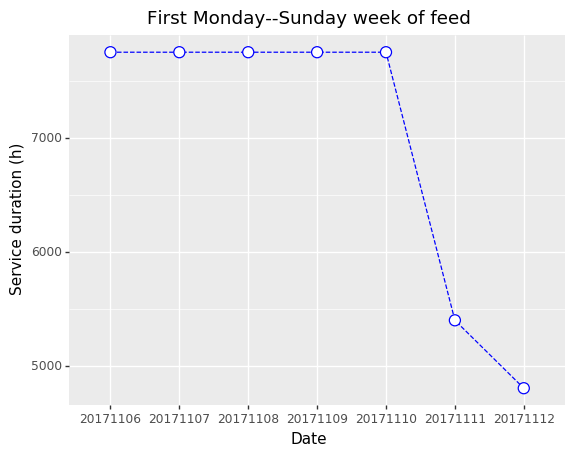

<ggplot: (297887734)>

In [12]:
import plotnine as p9

(
    p9.ggplot(feed_stats, p9.aes(x='date', y='service_duration', group=1))
    + p9.geom_line(colour="blue", linetype="dashed")
    + p9.geom_point(colour="blue", size=4, shape='o', fill="white")
    + p9.xlab("Date") 
    + p9.ylab("Service duration (h)")
    + p9.ggtitle("First Monday--Sunday week of feed")
)

In [13]:
# Compute route time series
rts = feed.compute_route_time_series(trip_stats, dates, freq='H')
rts.head()

indicator           num_trip_ends                             ...  \
route_id                        1  2  3  4  5  6 6X  7 7X   A ...   
2017-11-06 00:00:00             0  0  4  0  6  0  0  4  0   2 ...   
2017-11-06 01:00:00             8  2  6  4  6  9  0  9  0   8 ...   
2017-11-06 02:00:00             6  6  6  6  6  7  0  6  0  12 ...   
2017-11-06 03:00:00             6  6  6  6  6  6  0  6  0  12 ...   
2017-11-06 04:00:00             6  6  6  6  6  6  0  6  0  13 ...   

indicator           service_speed                                             \
route_id                        H          J          L    M          N    Q   
2017-11-06 00:00:00     27.822162  24.701375  23.795736  0.0  22.935415  0.0   
2017-11-06 01:00:00     28.677327  24.283973  23.871657  0.0  23.886103  0.0   
2017-11-06 02:00:00     28.677327  24.031662  23.282430  0.0  23.846175  0.0   
2017-11-06 03:00:00     28.677327  24.031662  23.282430  0.0  23.846175  0.0   
2017-11-06 04:00:00     28.279031  24.031662  23.509166  0.0  23.895579  0.0   

indicator                              
route_id               R   SI   W   Z  
2017-11-06 00:00:00  0.0  0.0 NaN NaN  
2017-11-06 01:00:00  0.0  0.0 NaN NaN  
2017-11-06 02:00:00  0.0  0.0 NaN NaN  
2017-11-06 03:00:00  0.0  0.0 NaN NaN  
2017-11-06 04:00:00  0.0  0.0 NaN NaN  

[5 rows x 168 columns]

In [22]:
# Slice time series
inds = ['service_distance', 'service_duration', 'service_speed']
rids = ['2']
rts.loc[:, (inds, rids)]

indicator,service_distance,service_duration,service_speed
route_id,2,2,2
2017-11-06 00:00:00,330.742796,13.600000,24.319323
2017-11-06 01:00:00,253.485521,11.066667,22.905318
2017-11-06 02:00:00,245.565782,10.866667,22.598078
2017-11-06 03:00:00,245.194276,10.850000,22.598551
2017-11-06 04:00:00,248.794165,10.850000,22.930338
2017-11-06 05:00:00,318.405631,12.750000,24.972991
2017-11-06 06:00:00,6.087307,18.633333,0.326689
2017-11-06 07:00:00,0.000000,25.850000,0.000000
2017-11-06 08:00:00,0.000000,31.116667,0.000000


In [15]:
# Compute trip locations for every hour
rng = pd.date_range('2017/11/06', periods=24, freq='H')
times = [t.strftime("%H:%M:%S") for t in rng]
loc = feed.locate_trips(dates[0], times)
loc.dropna(axis=0, how='any',inplace=True)
loc

,trip_id,time,rel_dist,route_id,direction_id,shape_id,lon,lat
0,A20171105WKD_000100_2..S08R,01:00:00,0.636517,2,1.0,2..S08R,-74.000997,40.736725
1,A20171105WKD_000550_4..S01R,01:00:00,0.747303,4,1.0,4..S01R,-73.973453,40.678558
2,A20171105WKD_000650_1..S03R,01:00:00,0.950669,1,1.0,1..S03R,-74.012097,40.712143
3,A20171105WKD_000700_6..S01R,01:00:00,0.923687,6,1.0,6..S01R,-73.992981,40.728059
4,A20171105WKD_001500_4..S13R,01:00:00,0.518269,4,1.0,4..S13R,-73.991350,40.729875
5,A20171105WKD_002100_2..S08R,01:00:00,0.429826,2,1.0,2..S08R,-73.957146,40.797468
6,A20171105WKD_002100_2..S08R,02:00:00,0.944253,2,1.0,2..S08R,-73.950074,40.655477
7,A20171105WKD_002200_6..S01R,01:00:00,0.675607,6,1.0,6..S01R,-73.957514,40.776854
8,A20171105WKD_002550_1..S03R,01:00:00,0.666490,1,1.0,1..S03R,-73.981729,40.767720
9,A20171105WKD_002550_7..S97R,01:00:00,0.973625,7,1.0,7..S97R,-73.998611,40.759452


In [16]:
import folium
from IPython.display import HTML, display

In [17]:
# You need to install Folium for this to work
rids = feed.routes.route_id.loc[2:4]
mapa = feed.map_routes(rids)
mapa

In [18]:
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString

geometry = [Point(xy) for xy in zip(loc.lon, loc.lat)]
df = loc.drop(['lon', 'lat'], axis=1)
crs = {'init': 'epsg:4326'}
points = GeoDataFrame(df, crs=crs, geometry=geometry)
points

,trip_id,time,rel_dist,route_id,direction_id,shape_id,geometry
0,A20171105WKD_000100_2..S08R,01:00:00,0.636517,2,1.0,2..S08R,POINT (-74.00099693501713 40.73672468480159)
1,A20171105WKD_000550_4..S01R,01:00:00,0.747303,4,1.0,4..S01R,POINT (-73.97345325915246 40.67855834839557)
2,A20171105WKD_000650_1..S03R,01:00:00,0.950669,1,1.0,1..S03R,POINT (-74.01209713516039 40.71214302693863)
3,A20171105WKD_000700_6..S01R,01:00:00,0.923687,6,1.0,6..S01R,POINT (-73.99298125969129 40.72805904841712)
4,A20171105WKD_001500_4..S13R,01:00:00,0.518269,4,1.0,4..S13R,POINT (-73.99134974965692 40.72987514087516)
5,A20171105WKD_002100_2..S08R,01:00:00,0.429826,2,1.0,2..S08R,POINT (-73.9571461800105 40.79746798628413)
6,A20171105WKD_002100_2..S08R,02:00:00,0.944253,2,1.0,2..S08R,POINT (-73.95007353553819 40.65547658870623)
7,A20171105WKD_002200_6..S01R,01:00:00,0.675607,6,1.0,6..S01R,POINT (-73.95751397839574 40.77685408328126)
8,A20171105WKD_002550_1..S03R,01:00:00,0.666490,1,1.0,1..S03R,POINT (-73.98172889797235 40.76772015197471)
9,A20171105WKD_002550_7..S97R,01:00:00,0.973625,7,1.0,7..S97R,POINT (-73.99861140544961 40.75945245757438)


In [19]:
tiempoGeo = points[['time','trip_id','route_id','geometry','direction_id']]
tiempoGeo.head(20)

,time,trip_id,route_id,geometry,direction_id
0,01:00:00,A20171105WKD_000100_2..S08R,2,POINT (-74.00099693501713 40.73672468480159),1.0
1,01:00:00,A20171105WKD_000550_4..S01R,4,POINT (-73.97345325915246 40.67855834839557),1.0
2,01:00:00,A20171105WKD_000650_1..S03R,1,POINT (-74.01209713516039 40.71214302693863),1.0
3,01:00:00,A20171105WKD_000700_6..S01R,6,POINT (-73.99298125969129 40.72805904841712),1.0
4,01:00:00,A20171105WKD_001500_4..S13R,4,POINT (-73.99134974965692 40.72987514087516),1.0
5,01:00:00,A20171105WKD_002100_2..S08R,2,POINT (-73.9571461800105 40.79746798628413),1.0
6,02:00:00,A20171105WKD_002100_2..S08R,2,POINT (-73.95007353553819 40.65547658870623),1.0
7,01:00:00,A20171105WKD_002200_6..S01R,6,POINT (-73.95751397839574 40.77685408328126),1.0
8,01:00:00,A20171105WKD_002550_1..S03R,1,POINT (-73.98172889797235 40.76772015197471),1.0
9,01:00:00,A20171105WKD_002550_7..S97R,7,POINT (-73.99861140544961 40.75945245757438),1.0


In [20]:
rids

2    3
3    4
4    5
Name: route_id, dtype: object

In [40]:
### Pequeña App
direccion = ['1'] ### Escoge la direccion: 0 es ida y 1 regreso ###
n = os.path.normpath(path)
m = n.split('/')[1].split('.')[0]

output = 'data/' + m + '_recorrido_' + rids[0] + '_direccion_' + direccion[0] + '.csv'
final = tiempoGeo.loc[(tiempoGeo['route_id'] == rids[0]) & tiempoGeo['direction_id'].isin(direccion)]
final.head()

,time,trip_id,route_id,geometry,direction_id
0,01:00:00,A20171105WKD_000100_2..S08R,2,POINT (-74.00099693501713 40.73672468480159),1.0
5,01:00:00,A20171105WKD_002100_2..S08R,2,POINT (-73.9571461800105 40.79746798628413),1.0
6,02:00:00,A20171105WKD_002100_2..S08R,2,POINT (-73.95007353553819 40.65547658870623),1.0
14,01:00:00,A20171105WKD_004100_2..S08R,2,POINT (-73.88921477048071 40.8349131136728),1.0
15,02:00:00,A20171105WKD_004100_2..S08R,2,POINT (-73.98325016366682 40.68981832879788),1.0


In [41]:
final.to_csv(output,sep=',')

# Bicyles 

https://s3.amazonaws.com/tripdata/index.html

In [26]:
bikes = pd.read_csv('data/citibike.csv',sep=',')

In [71]:
bikes.tail(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1897582,229,2017-10-31 20:02:00,2017-10-31 20:05:49,362,Broadway & W 37 St,40.751726,-73.987535,477,W 41 St & 8 Ave,40.756405,-73.990026,27575,Subscriber,1951.0,1
1897583,765,2017-10-31 20:18:00,2017-10-31 20:30:45,362,Broadway & W 37 St,40.751726,-73.987535,3263,Cooper Square & Astor Pl,40.729515,-73.990753,28145,Subscriber,1993.0,1
1897584,681,2017-10-31 20:21:09,2017-10-31 20:32:31,362,Broadway & W 37 St,40.751726,-73.987535,499,Broadway & W 60 St,40.769155,-73.981918,29059,Subscriber,1978.0,1
1897585,894,2017-10-31 20:27:16,2017-10-31 20:42:10,362,Broadway & W 37 St,40.751726,-73.987535,438,St Marks Pl & 1 Ave,40.727791,-73.985649,20123,Subscriber,1993.0,1
1897586,344,2017-10-31 20:50:41,2017-10-31 20:56:26,362,Broadway & W 37 St,40.751726,-73.987535,472,E 32 St & Park Ave,40.745712,-73.981948,20933,Subscriber,1988.0,1
1897587,1769,2017-10-31 20:59:26,2017-10-31 21:28:55,362,Broadway & W 37 St,40.751726,-73.987535,3263,Cooper Square & Astor Pl,40.729515,-73.990753,20654,Subscriber,1961.0,2
1897588,376,2017-10-31 21:06:54,2017-10-31 21:13:10,362,Broadway & W 37 St,40.751726,-73.987535,3259,9 Ave & W 28 St,40.749370,-73.999234,15162,Subscriber,1983.0,1
1897589,3189,2017-10-31 21:10:24,2017-10-31 22:03:33,362,Broadway & W 37 St,40.751726,-73.987535,3158,W 63 St & Broadway,40.771639,-73.982614,15666,Subscriber,1955.0,1
1897590,142,2017-10-31 21:48:23,2017-10-31 21:50:46,362,Broadway & W 37 St,40.751726,-73.987535,465,Broadway & W 41 St,40.755136,-73.986580,28203,Subscriber,1971.0,1
1897591,391,2017-10-31 22:40:23,2017-10-31 22:46:55,362,Broadway & W 37 St,40.751726,-73.987535,2006,Central Park S & 6 Ave,40.765909,-73.976342,24867,Subscriber,1990.0,1


In [90]:
stationOrigin = 251
focus = bikes.loc[bikes['start station id'] == stationOrigin]
station251 = focus[['start station latitude','start station longitude','start station name','tripduration','end station id','end station name','end station latitude','end station longitude']]

station251.rename(columns={'start station latitude': 'startLat',
                           'start station longitude': 'startLon',
                           'start station name': 'startName',
                           'end station id': 'endID', 
                           'end station name': 'endName', 
                           'end station latitude': 'endLat',
                           'end station longitude': 'endLon'}, inplace=True)

station251.head()

,startLat,startLon,startName,tripduration,endID,endName,endLat,endLon
173,40.72318,-73.9948,Mott St & Prince St,554,3260,Mercer St & Bleecker St,40.727064,-73.996621
259,40.72318,-73.9948,Mott St & Prince St,1098,477,W 41 St & 8 Ave,40.756405,-73.990026
352,40.72318,-73.9948,Mott St & Prince St,526,376,John St & William St,40.708621,-74.007222
366,40.72318,-73.9948,Mott St & Prince St,470,369,Washington Pl & 6 Ave,40.732241,-74.000264
486,40.72318,-73.9948,Mott St & Prince St,1025,368,Carmine St & 6 Ave,40.730386,-74.002150


In [91]:
geom = [Point(xy) for xy in zip(station251.endLon, station251.endLat)]
geomStart = [Point(xy) for xy in zip(station251.startLon, station251.startLat)]

dfStation = station251.drop(['endLon', 'endLat'], axis=1)
dfStart = station251.drop(['startLon', 'startLat'], axis=1)

pointsStation = GeoDataFrame(dfStation, crs=crs, geometry=geom)
pointS = GeoDataFrame(dfStart, crs=crs, geometry=geomStart)

In [109]:
pointStart = points.iloc[0]
ps = pointStart.to_frame()
start = ps.T
start.to_csv('data/stationOrigin.csv',sep=',')

In [95]:
pointsDestination = pointsStation[['startName','tripduration','endID','endName','geometry']]
pointsDestination.head()

,startName,tripduration,endID,endName,geometry
173,Mott St & Prince St,554,3260,Mercer St & Bleecker St,POINT (-73.99662137031554 40.72706363348306)
259,Mott St & Prince St,1098,477,W 41 St & 8 Ave,POINT (-73.9900262 40.75640548)
352,Mott St & Prince St,526,376,John St & William St,POINT (-74.00722156 40.70862144)
366,Mott St & Prince St,470,369,Washington Pl & 6 Ave,POINT (-74.00026394 40.73224119)
486,Mott St & Prince St,1025,368,Carmine St & 6 Ave,POINT (-74.00214988 40.73038599)


In [96]:
n = os.path.normpath(path)
m = n.split('/')[1].split('.')[0]
outputStation = 'data/' + m + '_estacionOrigen_' + str(stationOrigin) + '.csv'
pointsDestination.to_csv(outputStation,sep=',')